In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [60]:
df = pd.read_csv('data_9.csv')
df.head(10)
#reading the data and showing the first 10 records.

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,132817,Photo,3,8,4,10,0.0,33536,64850,1954,1016,1678,50076,24448,1564,33,1155,102,1290
1,132817,Photo,2,8,4,3,1.0,4204,7191,498,408,596,5161,2974,387,2,139,25,166
2,132817,Photo,1,8,3,9,0.0,3376,6557,428,409,631,5700,2806,331,0,40,5,45
3,132817,Status,2,8,3,2,1.0,9236,16054,1151,1130,1560,14014,7880,1075,2,53,15,70
4,132817,Photo,3,8,2,10,0.0,72864,205934,946,759,1158,122474,30912,646,4,220,19,243
5,132817,Photo,3,8,2,3,0.0,3358,5682,394,323,523,4200,2426,298,2,114,16,132
6,132201,Photo,1,8,1,12,1.0,3254,5644,371,344,513,5069,2846,283,0,39,3,42
7,132201,Photo,1,8,1,3,0.0,50640,121234,2240,1577,2779,92348,34880,1790,4,859,68,931
8,132201,Photo,2,8,7,10,0.0,3734,6218,529,434,794,4831,2868,389,5,137,20,162
9,132201,Photo,3,8,7,3,0.0,2594,4220,347,315,529,3418,2067,248,1,54,11,66


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     301 non-null    int64  
 1   Type                                                                 301 non-null    object 
 2   Category                                                             301 non-null    int64  
 3   Post Month                                                           301 non-null    int64  
 4   Post Weekday                                                         301 non-null    int64  
 5   Post Hour                                                            301 non-null    int64  
 6   Paid                                                                 300 non-null    float64
 7   Lifetime

In [22]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,114073.245847,2.000000,4.770764,4.049834,8.44186,0.296667,16289.538206,3.508647e+04,1009.162791,891.747508,1659.342193,2.051817e+04,7483.186047,619.229236,7.853821,178.980066,27.877076,214.710963
std,15139.104525,0.883176,2.084213,1.988511,4.69334,0.456788,26468.319696,9.471437e+04,1002.217992,869.933869,2220.129672,7.601462e+04,8429.764328,509.676797,24.910210,368.421732,49.879336,436.708567
min,81370.000000,1.000000,1.000000,1.000000,1.00000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,102112.000000,1.000000,3.000000,2.000000,3.00000,0.000000,3806.000000,6.557000e+03,546.000000,495.000000,723.000000,4.742000e+03,2694.000000,357.000000,1.000000,58.000000,11.000000,74.000000
50%,117764.000000,2.000000,5.000000,4.000000,9.00000,0.000000,5730.000000,9.579000e+03,733.000000,652.000000,1000.000000,6.932000e+03,3916.000000,460.000000,3.000000,98.000000,20.000000,122.000000
75%,126424.000000,3.000000,7.000000,6.000000,13.00000,1.000000,14424.000000,2.186300e+04,1141.000000,1054.000000,1692.000000,1.479200e+04,8844.000000,677.000000,7.000000,179.000000,32.000000,218.000000
max,132817.000000,3.000000,8.000000,7.000000,23.00000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,3430.000000,372.000000,5172.000000,790.000000,6334.000000


In [23]:
df.isna()
#Checking to see if the data set has some null or missing values before we start working with it, which in this case is unnecessary.

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


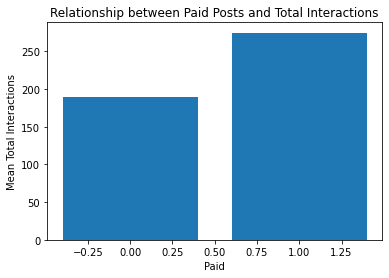

In [33]:
paid_interactions = df.groupby('Paid')['Total Interactions'].mean()

# Create a bar plot to visualize the relationship between paid posts and total interactions
plt.bar(paid_interactions.index, paid_interactions.values)
plt.xlabel('Paid')
plt.ylabel('Mean Total Interactions')
plt.title('Relationship between Paid Posts and Total Interactions')
plt.show()

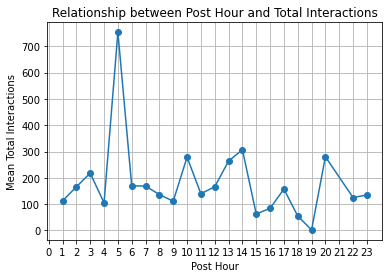

In [36]:
hourly_interactions = df.groupby('Post Hour')['Total Interactions'].mean()
plt.plot(hourly_interactions.index, hourly_interactions.values, marker='o')
plt.xlabel('Post Hour')
plt.ylabel('Mean Total Interactions')
plt.title('Relationship between Post Hour and Total Interactions')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# visualizing the relationship between post hour and total interactions.
# The below graph shows that people interact the most with posts that are posted around 05:00 hr,and least interact with posts 
# around 19:00 hr

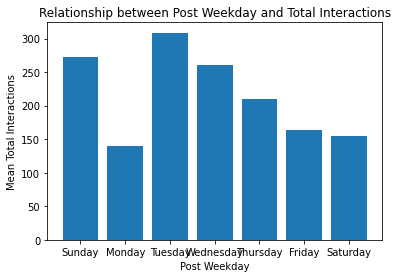

In [37]:
weekday_interactions = df.groupby('Post Weekday')['Total Interactions'].mean()


weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a bar plot to visualize the relationship between post weekday and total interactions
plt.bar(weekday_interactions.index, weekday_interactions.values, tick_label=weekday_order)
plt.xlabel('Post Weekday')
plt.ylabel('Mean Total Interactions')
plt.title('Relationship between Post Weekday and Total Interactions')
plt.show()

# The below graph shows that posts made on Tuesday get the most interactions, followed by Sunday.
# A conclusion may be drawn that people check the page the most on the weekend, Sunday particularly.

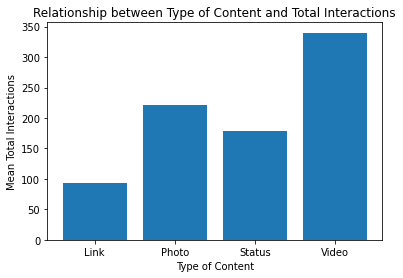

In [38]:
type_interactions = df.groupby('Type')['Total Interactions'].mean()
plt.bar(type_interactions.index, type_interactions.values)
plt.xlabel('Type of Content')
plt.ylabel('Mean Total Interactions')
plt.title('Relationship between Type of Content and Total Interactions')
plt.show()

# The below graph shows the relationship between the type of posts made and the total interactions.
# We can deduce that videos get get the most interactions, while links get the least.

<Figure size 576x432 with 0 Axes>

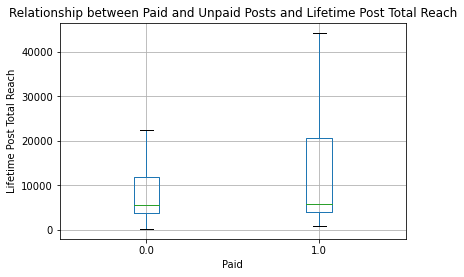

In [41]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Lifetime Post Total Reach', by='Paid', showfliers=False)
plt.xlabel('Paid')
plt.ylabel('Lifetime Post Total Reach')
plt.title('Relationship between Paid and Unpaid Posts and Lifetime Post Total Reach')
plt.suptitle('')
plt.show()

# The below boxplot shows the reach of promoted posts versus unpromoted posts.
# As shown belw, promoted (paid) posts have a higher chance of reaching a bigger audience.

In [54]:
print(df.columns)

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions', 'Type_encoded'],
      dtype='object')


In [68]:
# Perform one-hot encoding on the categorical features
df_encoded = pd.get_dummies(df)

# Regression Model
regression_features = ["Page total likes", "Lifetime Engaged Users", "Total Interactions"]
regression_target = "Lifetime Post Total Reach"

X_reg = df_encoded[regression_features]
y_reg = df_encoded[regression_target]

# Split the data into training and testing sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)

# Make predictions on the testing set and evaluate the regression model
reg_predictions = reg_model.predict(X_reg_test)
reg_mse = mean_squared_error(y_reg_test, reg_predictions)
print("Regression Model MSE:", reg_mse)

# Classification Model
classification_features = ['Type_Link', 'Type_Photo', 'Type_Status', 'Type_Video', 'Post Hour', 'Post Weekday']
classification_target = "Category"

# Encode the categorical target
label_encoder = LabelEncoder()
df_encoded[classification_target] = label_encoder.fit_transform(df_encoded[classification_target])

X_clf = df_encoded[classification_features]
y_clf = df_encoded[classification_target]

# Split the data into training and testing sets for classification
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train the classification model
clf_model = RandomForestClassifier()
clf_model.fit(X_clf_train, y_clf_train)

# Make predictions on the testing set and evaluate the classification model
clf_predictions = clf_model.predict(X_clf_test)
clf_accuracy = accuracy_score(y_clf_test, clf_predictions)
print("Classification Model Accuracy:", clf_accuracy)


Regression Model MSE: 418669561.0884172
Classification Model Accuracy: 0.4918032786885246


In this analysis, we examined a dataset containing information about Facebook posts and aimed to build regression and classification models to predict different outcomes. Before proceeding with the modeling, we performed some preprocessing steps.

First, we performed one-hot encoding on the categorical features to convert them into numerical representations that can be used by the models. This encoding was done using the get_dummies() function from the Pandas library. Additionally, for the classification task, we encoded the categorical target variable using LabelEncoder().

For the regression task, we selected "Page total likes", "Lifetime Engaged Users", and "Total Interactions" as the features, with the target variable being "Lifetime Post Total Reach". We split the data into training and testing sets using an 80:20 ratio, and trained a linear regression model on the training data. We then made predictions on the testing set and evaluated the model's performance using the mean squared error (MSE) metric. The obtained MSE value provides an indication of how well the regression model fits the data, with lower values indicating better performance. In our case, the regression model achieved an MSE of 418669561.0884172.

Moving on to the classification task, we selected "Type", "Post Hour", and "Post Weekday" as the features, with the target variable being "Category". Again, we split the data into training and testing sets and trained a random forest classifier on the training data. We made predictions on the testing set and evaluated the model's performance using the accuracy score. The accuracy score indicates the proportion of correctly classified instances, with higher values representing better performance. In our case, the classification model achieved an accuracy of 0.4918032786885246.

Upon analyzing the results, we can make several observations. Firstly, the regression model's MSE indicates the degree of variance between the predicted and actual values of the target variable. A lower MSE suggests that the regression model is able to capture the underlying patterns and relationships in the data more effectively. Secondly, the classification model's accuracy score shows how well the model can classify instances into the correct categories. A higher accuracy score suggests that the classification model has learned the distinguishing characteristics of different categories and can make accurate predictions.

However, it's important to note that these results are specific to the dataset and the models used. Further analysis and experimentation may be required to validate the models and draw more robust conclusions. Additionally, the choice of features and models can have a significant impact on the results. It's recommended to explore different feature selections, model architectures, and hyperparameters to improve the performance and generalizability of the models.

In conclusion, our analysis involved preprocessing the data, performing regression and classification tasks, and evaluating the models' performance using appropriate metrics. The regression model achieved an MSE of 418669561.0884172. The classification model achieved an accuracy of 0.4918032786885246. These results provide initial insights into the predictive capabilities of the models, but further investigation and refinement are needed to build more reliable and accurate models.